# Customer Segmentation 

About data :
An automobile company has plans to enter new markets with their 
existing products (P1, P2, P3, P4, and P5). 
After intensive market research, 
they’ve deduced that the behavior of the new market is similar to their existing market.
In their existing market, the sales team has classified 
all customers into 4 segments (A, B, C, D ).
Then, they performed segmented outreach 
and communication for a different segment of customers. 
This strategy has work e exceptionally well for them. 
They plan to use the same strategy for the new markets 
and have identified 2627 new potential customers.

# Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns
sns.set (style = 'white')

In [2]:
data = pd.read_csv("Train.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

From the results above, the dataset has alot of missing values. so we need to handling the missing data.
If I remove the missing values, I will loss alot of data. 

Based on references :
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

I will handling missing data with steps:
1. Fill the missing value in numerical variable with median value
2. Fill the missing value in categorical variable with most frequently value


In [5]:
#Imputing missing values in numerical variable with median 
data['Family_Size'] = data['Family_Size'].fillna(data['Family_Size'].median())
data['Work_Experience'] = data['Work_Experience'].fillna(data['Work_Experience'].median())

#Imputing missing values in categorical variables with most frequent values
data[['Ever_Married','Graduated','Profession','Var_1']] = data[['Ever_Married','Graduated','Profession','Var_1']].fillna("Unknown")


# EDA

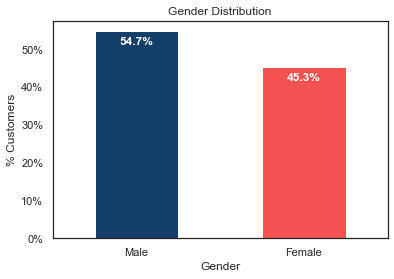

In [6]:
colors = ['#143F6B','#F55353']
ax = (data['Gender'].value_counts()*100.0/len(data)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

total = []

for i in ax.patches:
    total.append(i.get_width())
totals = sum(total)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5,
           str(round((i.get_height()/totals), 1))+ '%',
           fontsize = 12,
           color = 'white',
           weight = 'bold')

Text(0.5, 1.0, '% Of Customer')

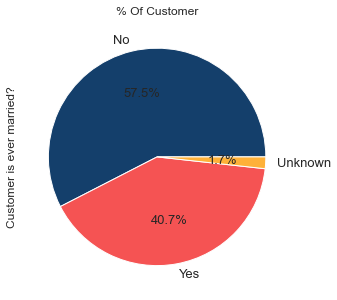

In [7]:
colors = ['#143F6B','#F55353','#FEB139']
ax = (data['Ever_Married'].value_counts()*100.0/len(data))\
.plot.pie(autopct = '%.1f%%', labels = ['No','Yes', 'Unknown'], colors = colors, figsize = (5,5), fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer is ever married?', fontsize = 12)
ax.set_title('% Of Customer', fontsize = 12)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by Their Age')

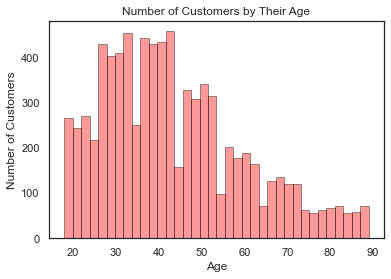

In [8]:
ax = sns.distplot(data['Age'], hist = True, kde = False,
                 bins = int(180/5), color = 'red',
                 hist_kws = {'edgecolor':'black'},
                 kde_kws = {'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_title('Age (year)')
ax.set_title('Number of Customers by Their Age')
              

Text(0.5, 1.0, '% Of Customer')

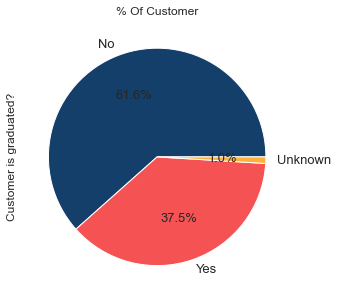

In [9]:
colors = ['#143F6B','#F55353','#FEB139']
ax = (data['Graduated'].value_counts()*100.0/len(data))\
.plot.pie(autopct = '%.1f%%', labels = ['No','Yes', 'Unknown'], colors = colors, figsize = (5,5), fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customer is graduated?', fontsize = 12)
ax.set_title('% Of Customer', fontsize = 12)

Text(0.5, 1.0, 'Customers Profession')

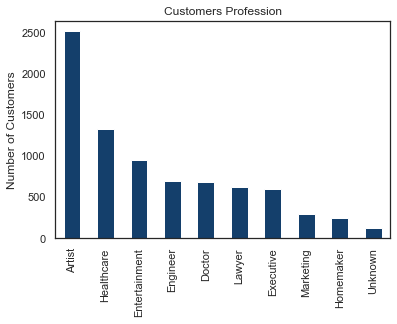

In [10]:
ax = data['Profession'].value_counts().plot(kind = 'bar', rot = 90, width = 0.5, color = ['#143F6B'])
ax.set_ylabel('Number of Customers')
ax.set_title('Customers Profession')

Text(0.5, 1.0, 'Work Experience (Years)')

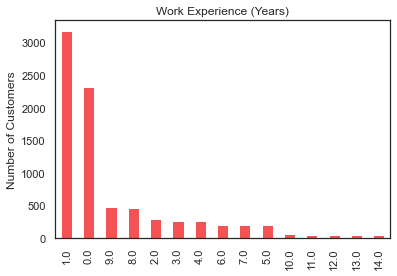

In [11]:
ax = data['Work_Experience'].value_counts().plot(kind = 'bar', rot = 90, width = 0.5, color = ['#F55353'])
ax.set_ylabel('Number of Customers')
ax.set_title('Work Experience (Years)')


Text(0.5, 1.0, 'Spending_Score')

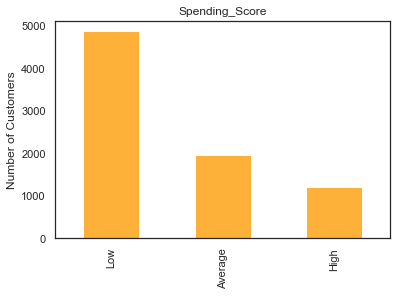

In [12]:
ax = data['Spending_Score'].value_counts().plot(kind = 'bar', rot = 90, width = 0.5, color = ['#FEB139'])
ax.set_ylabel('Number of Customers')
ax.set_title('Spending_Score')

Text(0.5, 1.0, 'Family_Size')

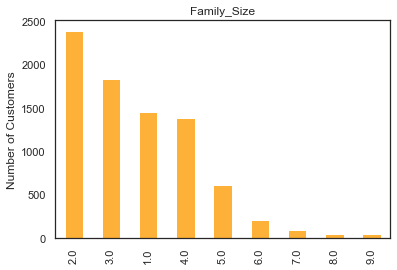

In [13]:
ax = data['Family_Size'].value_counts().plot(kind = 'bar', rot = 90, width = 0.5, color = ['#FEB139'])
ax.set_ylabel('Number of Customers')
ax.set_title('Family_Size')

Text(0.5, 1.0, 'Segmentation')

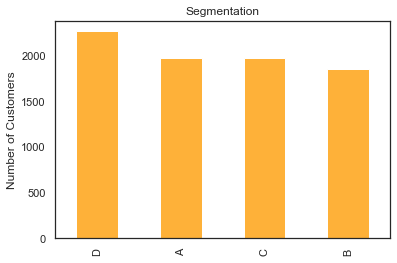

In [14]:
ax = data['Segmentation'].value_counts().plot(kind = 'bar', rot = 90, width = 0.5, color = ['#FEB139'])
ax.set_ylabel('Number of Customers')
ax.set_title('Segmentation')

In [16]:
df = data.drop(columns = ['ID','Segmentation'])
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Unknown,0.0,Low,7.0,Cat_1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


### Label Encoding
label encoding is converting the categorical labels into a numeric form so them can become machine readable form

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [18]:
encode = LabelEncoder()
df['Gender'] = encode.fit_transform(df['Gender'])
df['Ever_Married'] = encode.fit_transform(df['Ever_Married'])
df['Graduated'] = encode.fit_transform(df['Graduated'])
df['Profession'] = encode.fit_transform(df['Profession'])
df['Spending_Score'] = encode.fit_transform(df['Spending_Score'])
df['Var_1'] = encode.fit_transform(df['Var_1'])

In [19]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,2,38,2,2,1.0,0,3.0,3
2,0,2,67,2,2,1.0,2,1.0,5
3,1,2,67,2,7,0.0,1,2.0,5
4,0,2,40,2,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,9,0.0,2,7.0,0
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,2,5,1.0,2,1.0,5
8066,0,0,27,2,5,1.0,2,4.0,5


### Scaling data 
Scale data into the same range (0-1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [22]:
data_scaled

array([[ 0.90916397, -1.19595659, -1.28462344, ...,  0.754462  ,
         0.76269849, -0.80783672],
       [-1.0999116 ,  0.85135463, -0.32715082, ..., -1.60301259,
         0.09580227, -0.80783672],
       [-1.0999116 ,  0.85135463,  1.40826831, ...,  0.754462  ,
        -1.23799017,  0.5775659 ],
       ...,
       [-1.0999116 , -1.19595659, -0.62636101, ...,  0.754462  ,
        -1.23799017,  0.5775659 ],
       [-1.0999116 , -1.19595659, -0.98541324, ...,  0.754462  ,
         0.76269849,  0.5775659 ],
       [ 0.90916397,  0.85135463, -0.38699286, ..., -1.60301259,
         0.09580227, -0.80783672]])

In [24]:
WCSS = []
range_value = range(1,10)
for i in range_value:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

In [25]:
print(WCSS)

[2452809.205751123, 907547.21884695, 518610.6458535891, 365243.9070314336, 300951.20676535246, 260153.91109672736, 230426.92283407226, 205590.47237039244, 183917.2725380767]


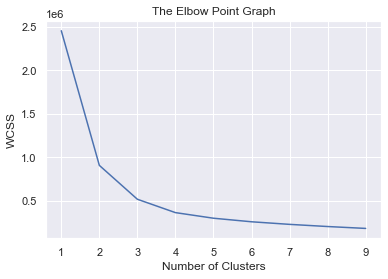

In [26]:
sns.set()
plt.plot(range(1,10), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [28]:
labels , len(labels)

(array([1, 2, 0, ..., 1, 1, 2]), 8068)

In [29]:
np.unique(labels, return_counts = True)

(array([0, 1, 2]), array([2183, 3407, 2478], dtype=int64))

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.117319,0.740638,0.992747,0.173592,0.312013,-0.233151,0.343363,-0.550922,0.251850
1,-0.140485,-1.081483,-0.738018,-0.284480,0.147468,0.150176,0.745467,0.137887,-0.137297
2,0.089811,0.834424,0.140481,0.238179,-0.477303,-0.001176,-1.326753,0.295414,-0.032984


In [32]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.605866,1.891842,60.056370,1.408799,3.706233,1.711732,1.651237,2.030247,4.529789
1,0.477546,0.111829,31.134136,0.966539,3.273261,2.963311,1.992369,3.063105,3.968007
2,0.592174,1.983461,45.814441,1.471158,1.629286,2.469141,0.234369,3.299314,4.118596


In [35]:
data_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
data_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,cluster
0,1,0,22,0,5,1.0,2,4.0,3,1
1,0,2,38,2,2,1.0,0,3.0,3,2
2,0,2,67,2,2,1.0,2,1.0,5,0
3,1,2,67,2,7,0.0,1,2.0,5,0
4,0,2,40,2,3,1.0,1,6.0,5,2


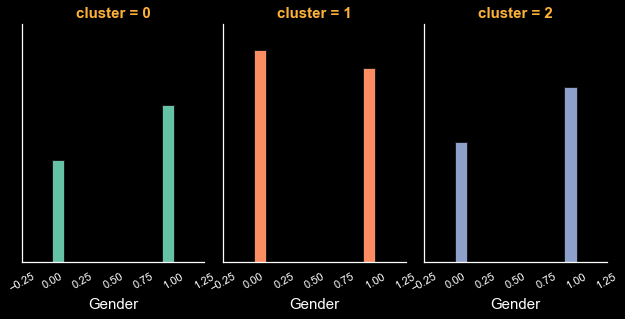

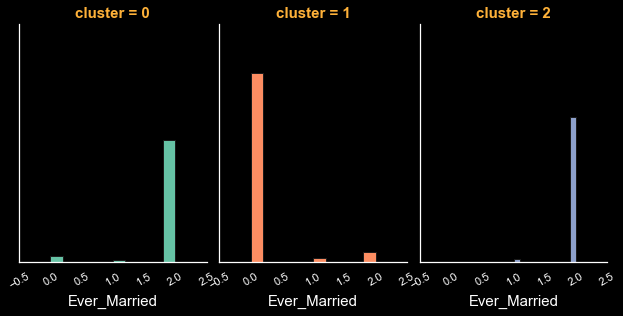

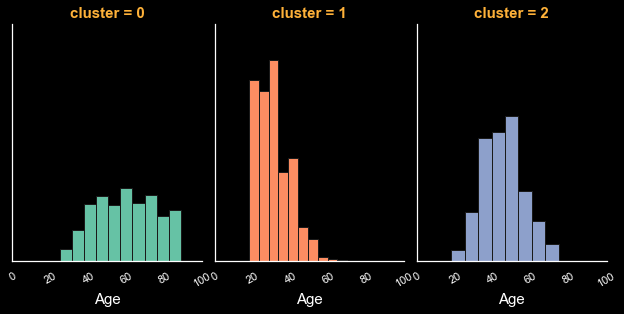

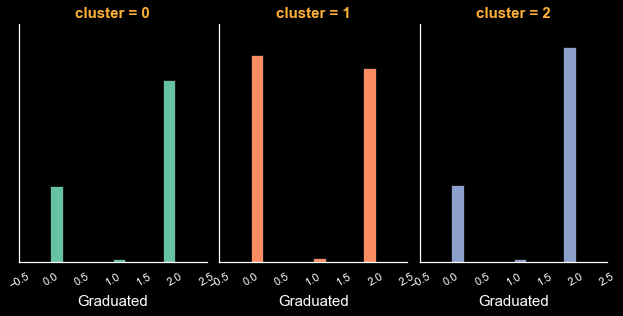

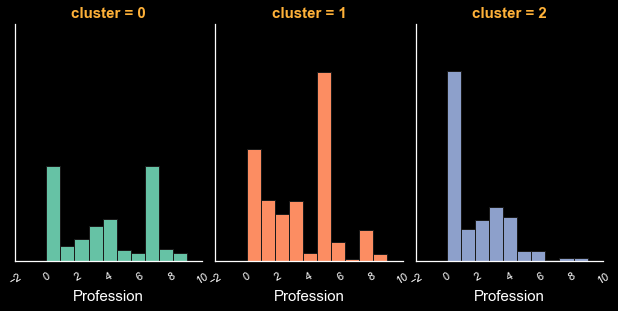

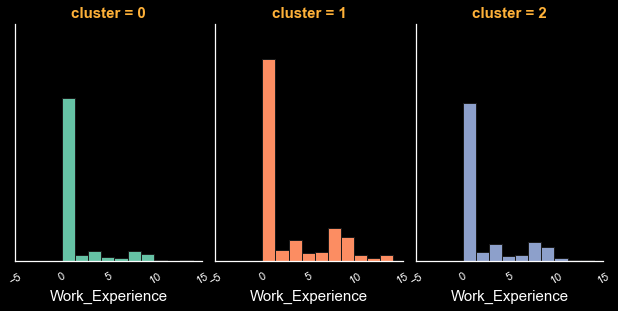

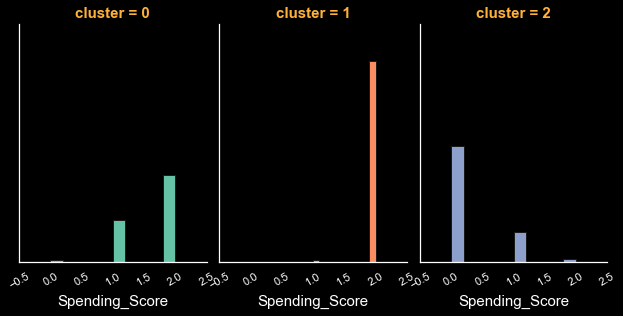

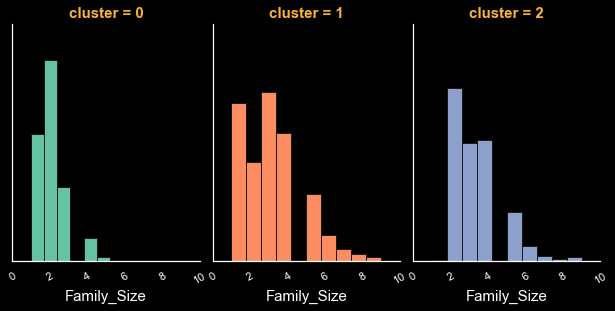

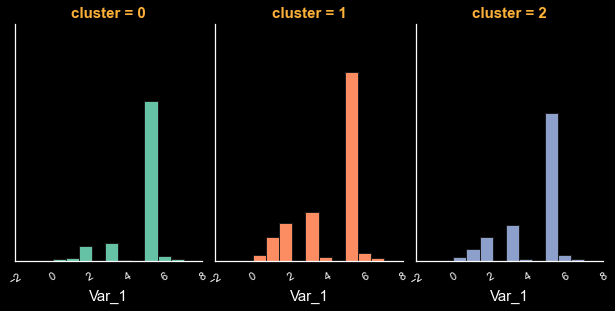

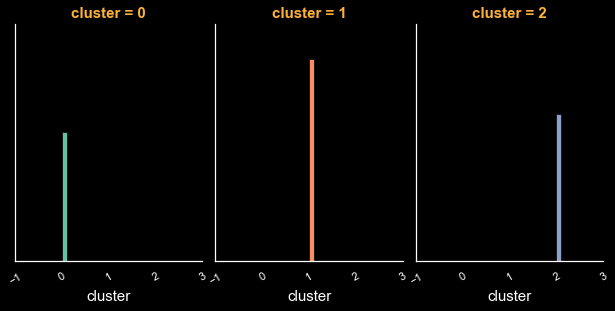

In [36]:
sns.set(rc={'axes.facecolor': 'black', 'figure.facecolor':'black', 'axes.grid':False})

for i in data_cluster:
    g = sns.FacetGrid(data_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k")
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FEB139', fontweight = 'bold')
    g.fig.set_figheight(5);

In [37]:
import matplotlib as mpl

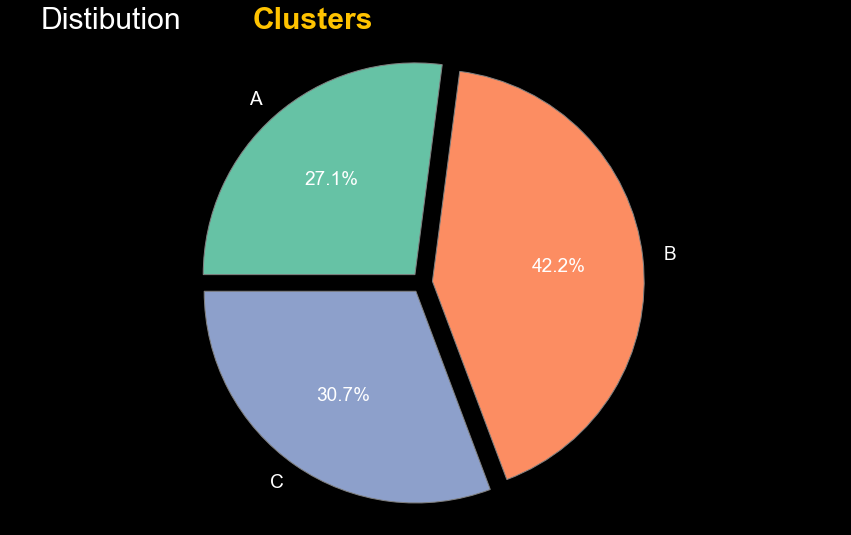

In [39]:
clusters_count = data_cluster['cluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index()
clusters_count.columns = ['clusters', 'count']
clusters_count = clusters_count.sort_values('clusters', ascending = True)

labels = ["A", "B", "C"]

plt.figure(figsize=(15,9))
mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'],
       explode = (0.05, 0.05, 0.05),
       labels = labels,
       colors = colors,
       autopct = '%1.1f%%',
       textprops = dict(color = "white", fontsize = 19),
       counterclock = False,
       startangle = 180,
       wedgeprops = {"edgecolor":"gray", 'linewidth':1}
       )
plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color = "#FFC300", fontweight = "bold")
plt.text(-1.8, 1.2, "Distibution", size=30, color= "white")
plt.show()
